In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier
import re
from statistics import mode 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [24]:
df=pd.read_csv("information.csv",encoding="latin1")

In [25]:
df=df[(df['gender'].isin(['male','female'])) & (df["gender:confidence"]>0.99)]

In [26]:
print(df['description'].isnull().sum())
df = df.dropna(axis=0, subset=['description','sidebar_color','link_color'])
print(df['description'].isnull().sum())

1254
0


In [27]:
def normalize_text(text):
    text=str(text)
    text=text.lower()
    # Remove non-ASCII chars.
    text = re.sub('[^\x00-\x7F]+',' ', text)
    
    # Remove URLs
    text = re.sub('https?:\/\/.*[\r\n]*', ' ', text)
    
    # Remove special chars.
    text = re.sub('[?!+%{}:;.,"\'()\[\]_]', '',text)
    
    # Remove double spaces.
    text = re.sub('\s+',' ',text)
    
    return text

In [28]:
df["text_norm"] = [normalize_text(text) for text in df["text"]]
df['description_norm'] = [normalize_text(text) for text in df["text"]]

In [29]:
vectorizer = CountVectorizer()
df['all_features'] = df['text_norm'].str.cat(df['description_norm'], sep=' ')
df['all_features'] = [normalize_text(text) for text in df['all_features']]

In [30]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [31]:
def cleanserS(sentence):
    words=list(word_tokenize(sentence))
    lemmatizer = WordNetLemmatizer() 
    lem=list(map(lemmatizer.lemmatize,words))
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in lem if not w in stop_words]
    sentences=' '.join(filtered_sentence)
    return sentences

In [32]:
correct=[]

In [33]:
for index, row in df.iterrows():
    correct.append(cleanserS(row['all_features']))

In [34]:
df['corrected']=(correct)

In [36]:
vectorizer = CountVectorizer()
temp_df = pd.DataFrame(vectorizer.fit_transform(df['corrected']).toarray())
feature_col=temp_df.columns.tolist()
df=df.reset_index()
cols = list(df.columns)
cols.remove('index')
df = df[cols]
main_df = df.join(temp_df)
encoder = LabelEncoder()
y = encoder.fit_transform(df['gender'])
feature
x=main_df[feature_col]
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

nb = MultinomialNB()
nb.fit(x_train, y_train)
ypred=nb.predict(x_test)
print(nb.score(x_test, y_test))

0.6202964652223489


In [14]:
model1=LogisticRegression()

In [15]:
model1.fit(x_train, y_train)
y_pred1=model1.predict(x_test)
score = model1.score(x_test, y_test)
print(score)

0.5820980615735462


In [16]:
model2=SVC()

In [17]:
model2.fit(x_train,y_train)
y_pred2= model2.predict(x_test) 

In [18]:
accuracy_score(y_test,y_pred2)

0.6020524515393386

In [19]:
model3=RandomForestClassifier(n_estimators=100)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
accuracy_score(y_test,y_pred3)

0.5758266818700114

In [20]:
final_pred = np.array([])
for i in range(0,x_test.shape[0]):
    final_pred = np.append(final_pred, mode([y_pred3[i],y_pred1[i], y_pred2[i]]))

In [21]:
accuracy_score(y_test,final_pred)

0.5980615735461802

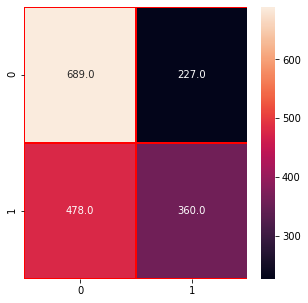

<Figure size 432x288 with 0 Axes>

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,final_pred)
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()
plt.savefig('graph.png')